In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [116]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')

Taking a look at the data given. 

In [117]:
df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [118]:
df.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0
26495,34895,2017-06-23 23:00:00,-2.1,-11.4,1009.0,71.880,A,210.0


In [119]:
dft.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [120]:
dft.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2
8563,35059,2017-06-30 19:00:00,-5.7,-18.6,998.0,233.595,A
8564,35060,2017-06-30 20:00:00,-5.7,-17.1,995.0,238.780,A
8565,35061,2017-06-30 21:00:00,-7.1,-19.3,1004.0,244.325,A
8566,35062,2017-06-30 22:00:00,-6.4,-19.3,1008.0,247.470,A
8567,35063,2017-06-30 23:00:00,-5.0,-16.4,1001.0,250.600,A


checking if there is missing data or not 

In [177]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Good no missing data 

In [122]:
print(df.shape)
print(dft.shape)

(26496, 8)
(8568, 7)


First I am taking the basic 

In [123]:
df['datetime']=pd.to_datetime(df['datetime'])

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null datetime64[ns]
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [125]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour


In [126]:
df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,hour
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0,2013,7,0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0,2013,7,1
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0,2013,7,2
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0,2013,7,3
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0,2013,7,4


Ok now checking the distribution of the electricity_consumption

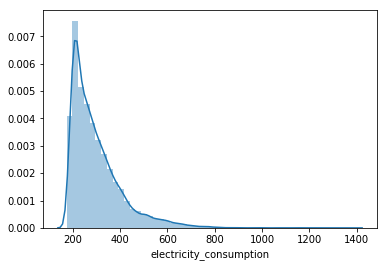

In [127]:
sns.distplot(df['electricity_consumption'])

its highly left alligned so will do log transformed

In [128]:
df["electricity_log"] = np.log1p(df["electricity_consumption"])

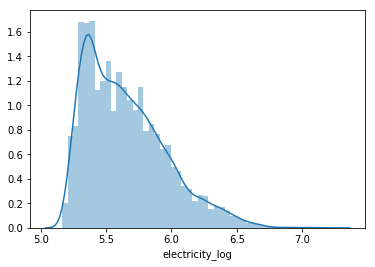

In [129]:
sns.distplot(df['electricity_log'])

Much better spread

Now working with temperatuer

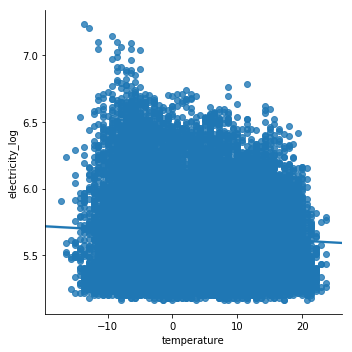

In [130]:
sns.lmplot(x='temperature',y='electricity_log' , data=df)

spread all over 

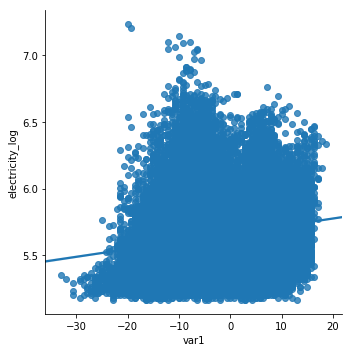

In [131]:
sns.lmplot(x='var1',y='electricity_log' , data=df)

it seems those 2 poins are outliers in all the variables

In [132]:
df.electricity_log.describe()

count    26496.000000
mean         5.649362
std          0.309572
min          5.164786
25%          5.393628
50%          5.590987
75%          5.837730
max          7.234898
Name: electricity_log, dtype: float64

In [133]:
df = df.drop(df[df.electricity_log > 7 ].index)

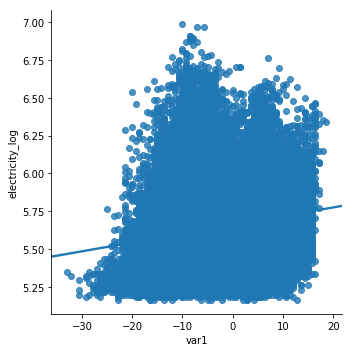

In [134]:
sns.lmplot(x='var1',y='electricity_log' , data=df)

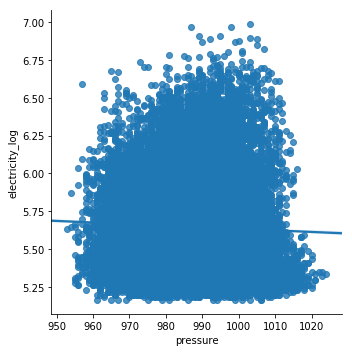

In [135]:
sns.lmplot(x='pressure',y='electricity_log' , data=df)

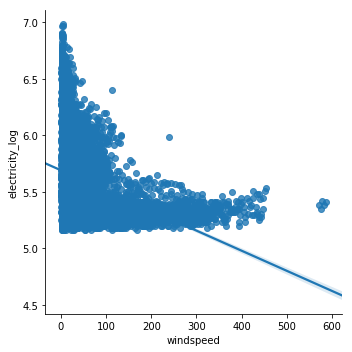

In [136]:
sns.lmplot(x='windspeed',y='electricity_log' , data=df)

In [137]:
df['var2'].value_counts()

A    25228
C     1040
B      217
Name: var2, dtype: int64

In [138]:
dft['var2'].value_counts()

A    8177
C     324
B      67
Name: var2, dtype: int64

In [139]:
d=pd.get_dummies(df['var2'], prefix='var2')
d.head()


,var2_A,var2_B,var2_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [140]:
df=pd.concat([df,d],1)

In [141]:
df['year'].value_counts()

2016    6624
2014    6622
2015    6615
2013    3312
2017    3312
Name: year, dtype: int64

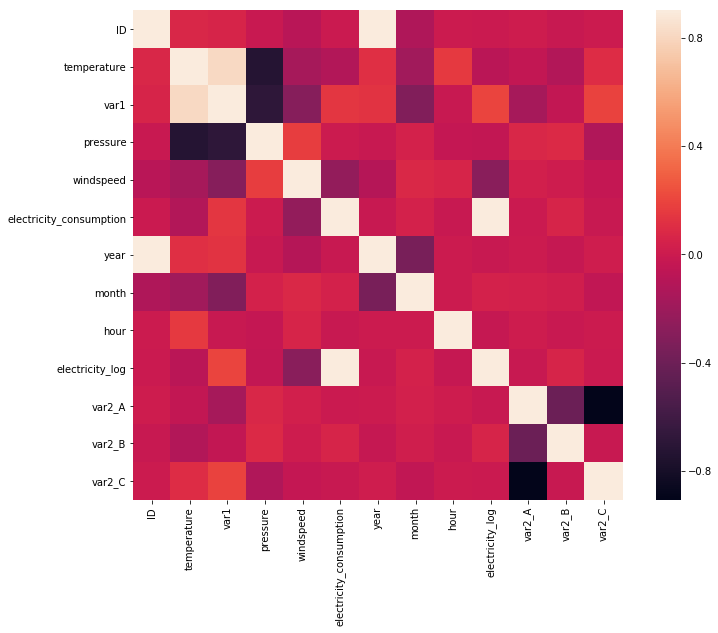

In [142]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [143]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26485 entries, 0 to 26495
Data columns (total 15 columns):
ID                         26485 non-null int64
datetime                   26485 non-null datetime64[ns]
temperature                26485 non-null float64
var1                       26485 non-null float64
pressure                   26485 non-null float64
windspeed                  26485 non-null float64
var2                       26485 non-null object
electricity_consumption    26485 non-null float64
year                       26485 non-null int64
month                      26485 non-null int64
hour                       26485 non-null int64
electricity_log            26485 non-null float64
var2_A                     26485 non-null uint8
var2_B                     26485 non-null uint8
var2_C                     26485 non-null uint8
dtypes: datetime64[ns](1), float64(6), int64(4), object(1), uint8(3)
memory usage: 4.0+ MB


In [144]:
df=df.drop(['ID','datetime','var2','electricity_consumption'],1)

In [145]:
y=df.electricity_log
df.head()
df=df.drop(['electricity_log'],1)

In [146]:
#q=df.copy()

In [147]:
#df=df.drop(['var1'],1)
#df=q.copy()

In [148]:
df.head()

,temperature,var1,pressure,windspeed,year,month,hour,var2_A,var2_B,var2_C
0,-11.4,-17.1,1003.0,571.910,2013,7,0,1,0,0
1,-12.1,-19.3,996.0,575.040,2013,7,1,1,0,0
2,-12.9,-20.0,1000.0,578.435,2013,7,2,1,0,0
3,-11.4,-17.1,995.0,582.580,2013,7,3,1,0,0
4,-11.4,-19.3,1005.0,586.600,2013,7,4,1,0,0


In [149]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [150]:
n_folds=3
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

LASSO Regression

In [151]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [152]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.2680 (0.0115)



Elasticnet

In [153]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.5, random_state=3))

In [154]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.2681 (0.0115)



Kernal ridge regression

In [44]:
#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=1.5)

In [45]:
#score = rmsle_cv(KRR)
#print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\DX\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.431897633924739e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\DX\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.4595762835909716e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\DX\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.4464885875998768e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


Kernel Ridge score: 0.2568 (0.0080)



Gradient Boosting Regression :

In [155]:
GBoost = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [156]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.2374 (0.0128)



In [157]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_ ])
        return np.mean(predictions, axis=1)

In [178]:
averaged_models = AveragingModels(models = (ENet, GBoost,lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.2511 (0.0124)



In [179]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)
#openingPriceTest = np.reshape(openingPriceTest,(openingPriceTest.size,1))
#closingPriceTest = np.reshape(closingPriceTest,(closingPriceTest.size,1))

In [181]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)
#print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [160]:
dft.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [161]:
dft['datetime']=pd.to_datetime(dft['datetime'])

In [162]:
dft['year'] = dft['datetime'].dt.year
dft['month'] = dft['datetime'].dt.month
dft['hour'] = dft['datetime'].dt.hour

In [163]:
d=pd.get_dummies(dft['var2'], prefix='var2')
d.head()


,var2_A,var2_B,var2_C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [164]:
dft=pd.concat([dft,d],1)

In [165]:
dft['year'].value_counts()

2016    2160
2015    2136
2014    2136
2013    1104
2017    1032
Name: year, dtype: int64

In [166]:
dft.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,year,month,hour,var2_A,var2_B,var2_C
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A,2013,7,0,1,0,0
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A,2013,7,1,1,0,0
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A,2013,7,2,1,0,0
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A,2013,7,3,1,0,0
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A,2013,7,4,1,0,0


In [167]:
pq=pd.DataFrame()
pq=dft['ID']
dft=dft.drop(['ID','datetime'],1)

In [183]:
stacked_averaged_models.fit(df.values,y)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [182]:
stacked_pred = np.expm1(AveragingModels.predict(dft.values))


TypeError: predict() missing 1 required positional argument: 'X'

In [86]:
df.head()

,temperature,var1,pressure,windspeed,year,month,hour,var2_A,var2_B,var2_C,var2_A,var2_B,var2_C
0,-11.4,-17.1,1003.0,571.910,2013,7,0,1,0,0,1,0,0
1,-12.1,-19.3,996.0,575.040,2013,7,1,1,0,0,1,0,0
2,-12.9,-20.0,1000.0,578.435,2013,7,2,1,0,0,1,0,0
3,-11.4,-17.1,995.0,582.580,2013,7,3,1,0,0,1,0,0
4,-11.4,-19.3,1005.0,586.600,2013,7,4,1,0,0,1,0,0


In [106]:
score

AveragingModels(models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False...ve=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])))

In [113]:

stacked_averaged_models.fit(dft.values, y)

ValueError: Found input variables with inconsistent numbers of samples: [8568, 26485]

In [168]:
y.shape

(26485,)